In [ ]:
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy import odr
from scipy import signal

plt.rcParams["figure.figsize"]=10,5

In [7]:
def my_round(X , DX) :
    Ndecimal = np.int(np.ceil(np.abs(np.log10(DX))))
    DX = np.around( DX , Ndecimal )
    X = np.around( X , Ndecimal )
    return X , DX

def tellme(s):
    print(s)
    plt.title(s, fontsize=16)
    plt.draw()

def affine(x,a,b) :
    return a * x + b

def affineODR(P,x) :
    return P[0] * x + P[1]

def lineaire(x,a) :
    return a * x

def sinc2(B,x) :
    return B[0] * (np.sinc(B[1]*(x-B[2])))**2 + B[3]    # ATTENTION np.sinc(x) est defini comme sin( PI * x ) / (PI * x)  et pas (sinx)/x

In [8]:
def read_spec(name):

    Y = np.genfromtxt(name)
    X = np.zeros(len(Y))

    poss = np.array(['y','n'])

    for i in range(0,len(X)) :
        X[i] = X[i] + sizepix*i

    # La taille totale est inferieure a la taille de la doc, en effet le premier pixel a son centre positionner en 0 donc il manque un demi pixel, et le dernier donne la position de son centre egalement donc il manque sa moitie de pixel a droite donc si on prend la distance X[-1] + 2 * 1/2 * sizepix on a bien dtheorique

    Xinit = X.copy()
    Yinit = Y.copy()

    Xth = np.linspace(np.min(X),np.max(X),10000)

    #%matplotlib notebook
    fig = plt.subplots()
    ax1 = plt.subplot(211)

    ax1.set_xlabel(r'l (mm)')
    ax1.plot(X,Y,'.', color='grey')

    #plt.show()

    plt.gca().set_xticklabels([])  
    
    ax2=plt.subplot(212)

    ax2.set_xlabel(r'l (mm)')
    Booli = np.zeros(len(X),dtype=np.bool)

    for i in range(0,len(X)) :
        if Y[i] < 0.95 * np.max(Y) : Booli[i] = True

    Xi = X[np.invert(Booli)]
    Yi = Y[np.invert(Booli)]

    ax2.plot(X,Y,'.', color='blue')
    ax2.plot(Xi,Yi,'.', color='red')

    
    plt.tight_layout(pad=0.2) # Optimiser la taille des plots sur la page    

    plt.subplots_adjust(wspace=0, hspace=0) # Ajuster les positions des subplots
            
    plt.savefig('Data'+str(name)+'.pdf',format='pdf')
    
    plt.show()
    tellme('ok')
    plt.close()
    

    ok=''

    while not ok in poss:
        try:
            ok = input("Remove Max ? (y/n) :")
        except:
            print(" y or n")
            pass

    if ok == 'y' :

        X = X[Booli]
        Y = Y[Booli]


    Ysmooth = signal.savgol_filter(Y, 51, 3)

    plt.plot(X,Y,'.', color='grey',label='data')
    plt.plot(X,Ysmooth,'x', color='red',label='smooth')
    
    plt.legend()
    plt.savefig('Smooth'+str(name)+'.pdf',format='pdf')
    plt.show()


    ok=''

    while not ok in poss:
        try:
            ok = input("Smooth ? (y/n) :")
        except:
            print(" 'y' or 'n'")
            pass
        
        
    if ok == 'y' :

        Y = Ysmooth


    return{'X':X , 'Y':Y , 'Xi':Xi , 'Yi':Yi, 'Xth':Xth , 'Xinit':Xinit , 'Yinit':Yinit }

def cut_window(SPEC,popt) :

    Booli = np.invert(np.zeros(len(SPEC['X']),dtype=np.bool))


    Window = 4/popt[1]

    for i in range (0,len(SPEC['X'])) :
        if SPEC['X'][i] < popt[2]-Window : Booli[i] = False
        if SPEC['X'][i] > popt[2]+Window : Booli[i] = False

    Xout = SPEC['X'][np.invert(Booli)]
    Yout = SPEC['Y'][np.invert(Booli)]


    plt.plot(SPEC['X'],SPEC['Y'],'.', color='blue')
    plt.plot(Xout,Yout,'.', color='red')

    plt.show()

    poss = np.array(['y','n'])

    ok=''

    while not ok in poss:
        try:
            ok = input("Remove out ? ('y'/'n') :")
        except:
            print(" 'y' or 'n'")
            pass

    if ok == 'y' :

        SPEC['X'] = SPEC['X'][Booli]
        SPEC['Y'] = SPEC['Y'][Booli]

    return{'X':SPEC['X'] , 'Y':SPEC['Y'] , 'Xth':SPEC['Xth'] , 'Xinit':SPEC['Xinit'] , 'Yinit':SPEC['Yinit']}




In [9]:
b = 0.1 # taille typique de la fente
bconstr = 1./16. # taille fente constructeur ATTENTION : penser a faire la division de float sinon il arrondi a 0 
fl = 160 # Focale lentille
wl = 632.8 * 10**-6 # longueur d onde laser mm
sizepix = 0.014 # taille des pixels en mm 

In [10]:
ls -lrt

total 3848
-rw-r--r--@  1 Johany  staff   28007 Nov 14 17:09 Schema_Diffraction.svg
-rw-r--r--@  1 Johany  staff   14966 Nov 16 15:33 Schema_Diffraction.pdf
-rw-r--r--@  1 Johany  staff  139714 Nov 17 12:21 principe-huygens_1.svg
-rw-r--r--@  1 Johany  staff   29488 Nov 17 12:28 principe-huygens_1.pdf
-rw-r--r--@  1 Johany  staff   31687 Nov 17 16:37 Schema1-Huygens.pdf
-rw-r--r--@  1 Johany  staff  102966 Nov 17 17:15 principe-huygens_2.png
-rw-r--r--@  1 Johany  staff  115540 Nov 17 17:20 Schema2-Huygens-Diffraction.pdf
-rwxr-xr-x@  1 Johany  staff  535876 Nov 17 17:20 Schema.key*
-rw-r--r--@  1 Johany  staff   36627 Nov 21 09:39 Diffraction surface eau.jpg
-rw-r--r--   1 Johany  staff    2628 Nov 22 18:11 Approximation_Fraunhofer.py
-rw-r--r--@  1 Johany  staff   20558 Nov 22 18:11 Approximation_Fraunhofer.pdf
-rwxr-xr-x@  1 Johany  staff  743616 Nov 22 18:13 Diapo.key*
-rwxr-xr-x   1 Johany  staff    6390 Jan 30 10:50 full.TXT*
-rwxr-xr-x   1 Johany  staff    6693 Jan 30 10:50 sat.

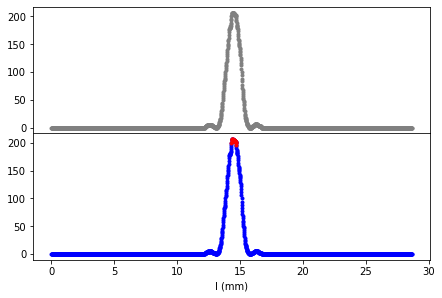

ok


In [ ]:
SPEC01 = read_spec('full.TXT')
SPEC02 = read_spec('sat.TXT')

In [ ]:
myModel = odr.Model(sinc2)

mydata1 = odr.RealData(x=SPEC01['X'],y=SPEC01['Y'])
myodr1 = odr.ODR(mydata1, myModel,beta0=[np.mean(SPEC01['Yi']),np.pi * b / (wl * fl) ,np.median(SPEC01['Xi']),np.median(SPEC01['Y'])])
myoutput1 = myodr1.run()
popt1=myoutput1.beta

mydata2 = odr.RealData(x=SPEC02['X'],y=SPEC02['Y'])
myodr2 = odr.ODR(mydata2, myModel,beta0=[np.mean(SPEC02['Yi']),np.pi * b / (wl * fl) ,np.median(SPEC02['Xi']),np.median(SPEC02['Y'])])
myoutput2 = myodr2.run()
popt2=myoutput2.beta

#popt1, pcov1 = curve_fit(sinc2, SPEC01['X'], SPEC01['Y'], p0=[np.mean(SPEC01['Yi']),np.pi * b / (wl * fl) ,np.median(SPEC01['Xi']),np.median(SPEC01['Y'])]) ## Curve_fit minimisation des moindre carre en utilisant l'alogorythme Levenberg-Marquardt. 
#popt2, pcov2 = curve_fit(sinc2, SPEC02['X'], SPEC02['Y'], p0=[np.mean(SPEC02['Yi']),np.pi * b / (wl * fl) ,np.median(SPEC02['Xi']),np.median(SPEC02['Y'])])


SPEC1 = cut_window(SPEC01,popt1)
SPEC2 = cut_window(SPEC02,popt1)

plt.figure(2)

plt.title('Donnees')

plt.plot(SPEC2['Xinit'],SPEC2['Yinit'],'x',color='rosybrown', label='initiales sat')
plt.plot(SPEC2['X'],SPEC2['Y'],'.',color='tomato', label='pour modelisation sat')

plt.plot(SPEC1['Xinit'],SPEC1['Yinit'],'x',color='grey', label='initiales')
plt.plot(SPEC1['X'],SPEC1['Y'],'.',color='royalblue', label='pour modelisation')

plt.xlabel(r'l (mm)')

plt.legend(loc='upper right' , prop={'size': 6})

plt.savefig('Donnees.pdf',transparent=True,format='pdf')


